In [118]:
import pandas as pd
import os
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from gensim.models.phrases import Phrases, Phraser
import re

In [91]:
os.chdir('D:/UofT/CSC2552/Project_Proposal/Data/Sample Data')

In [3]:
reddit_dat=pd.read_csv("Submissions_Nov2016", sep=',', encoding='utf-8')

C:\Users\bhara\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
reddit_dat.head()

,Unnamed: 0,link_flair_text,url,id,created_utc,title,author_flair_text,author,selftext,domain,num_comments,subreddit_id,score,permalink,subreddit
0,0,NaN,https://www.reddit.com/r/TumblrInAction/commen...,5afz2u,1477958400,[#572|+458|67] Dragon PTSD (Now 100% Rule 1C F...,NaN,nudelete,NaN,reddit.com,0.0,t5_38nn9,1.0,/r/Nudelete/comments/5afz2u/57245867_dragon_pt...,Nudelete
1,1,NaN,https://www.reddit.com/r/DestinyTheGame/commen...,5afz2v,1477958401,Weird request outbreak prime quest,NaN,Tyrod32,[removed],self.DestinyTheGame,5.0,t5_2vq0w,0.0,/r/DestinyTheGame/comments/5afz2v/weird_reques...,DestinyTheGame
2,2,NaN,https://i.reddituploads.com/c55c9b6b870d4231a6...,5afz2w,1477958401,"[OC] My cat DM'd our most recent session, resu...",NaN,Howlett2235,NaN,i.reddituploads.com,7.0,t5_2r9ei,20.0,/r/DnD/comments/5afz2w/oc_my_cat_dmd_our_most_...,DnD
3,3,NaN,https://youtu.be/QfxG8Ic6S9I,5afz2x,1477958401,Trace Bundy -- TEDx Set [Acoustic Guitar] (2015),NaN,cruiznjosh,NaN,youtu.be,0.0,t5_2qxzy,8.0,/r/listentothis/comments/5afz2x/trace_bundy_te...,listentothis
4,4,NaN,https://youtu.be/gTOnZbDVFHE,5afz2y,1477958402,Broadway Grill,NaN,theonlyboomer,NaN,youtu.be,1.0,t5_2tqlz,1.0,/r/youtubehaiku/comments/5afz2y/broadway_grill/,youtubehaiku


In [15]:
reddit_dat['title']=reddit_dat['title'].fillna('')

In [6]:
reddit_dat['title_sentiment_polarity']=reddit_dat.apply(lambda x:TextBlob(x.title).sentiment.polarity,axis=1)
reddit_dat['title_sentiment_subjectivity']=reddit_dat.apply(lambda x:TextBlob(x.title).sentiment.subjectivity,axis=1)

In [7]:
reddit_dat.head()

,Unnamed: 0,link_flair_text,url,id,created_utc,title,author_flair_text,author,selftext,domain,num_comments,subreddit_id,score,title_sentiment_polarity,title_sentiment_subjectivity
0,0,NaN,https://www.reddit.com/r/TumblrInAction/commen...,5afz2u,1.477958e+09,[#572|+458|67] Dragon PTSD (Now 100% Rule 1C F...,NaN,nudelete,NaN,reddit.com,0.0,t5_38nn9,1.0,0.46875,0.500
1,1,NaN,https://www.reddit.com/r/DestinyTheGame/commen...,5afz2v,1.477958e+09,Weird request outbreak prime quest,NaN,Tyrod32,[removed],self.DestinyTheGame,5.0,t5_2vq0w,0.0,-0.50000,1.000
2,2,NaN,https://i.reddituploads.com/c55c9b6b870d4231a6...,5afz2w,1.477958e+09,"[OC] My cat DM'd our most recent session, resu...",NaN,Howlett2235,NaN,i.reddituploads.com,7.0,t5_2r9ei,20.0,0.25000,0.375
3,3,NaN,https://youtu.be/QfxG8Ic6S9I,5afz2x,1.477958e+09,Trace Bundy -- TEDx Set [Acoustic Guitar] (2015),NaN,cruiznjosh,NaN,youtu.be,0.0,t5_2qxzy,8.0,0.00000,0.000
4,4,NaN,https://youtu.be/gTOnZbDVFHE,5afz2y,1.477958e+09,Broadway Grill,NaN,theonlyboomer,NaN,youtu.be,1.0,t5_2tqlz,1.0,0.00000,0.000


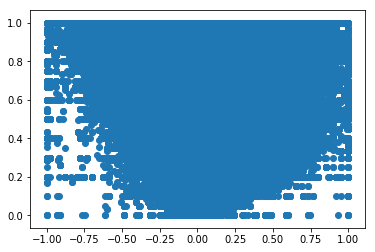

In [8]:
plt.scatter(reddit_dat['title_sentiment_polarity'],reddit_dat['title_sentiment_subjectivity'])

In [9]:
reddit_dat.to_csv("Submissions_Nov2016_WithSentimentScore.csv")

In [4]:
#subreddit_info=reddit_dat[['id','permalink','subreddit']].drop_duplicates(keep=False)

In [5]:
#subreddit_info.to_csv("Subreddit_Info.csv")

In [29]:
#reddit_dat.subreddit_id.nunique()

102645

In [144]:
reddit_dat=pd.read_csv("Submissions_Nov2016_WithSentimentScore.csv")

C:\Users\bhara\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
#web_source="([a-zA-Z]+\.((com)|(org)|(gov)))"
#reddit_dat["web_source"]=reddit_dat["url"].str.extract(web_source)[0]

In [25]:
#reddit_dat.to_csv("Submissions_Nov2016_WithSentimentScore.csv")

In [7]:
#ubreddit_info=subreddit_info[['subreddit_id','subreddit']].drop_duplicates(keep=False)
#eddit_dat=reddit_dat.merge(subreddit_info,on="id")

In [10]:
#reddit_dat.shape

In [11]:
#reddit_dat.to_csv("Submissions_Nov2016_WithSentimentScore.csv")

In [145]:
web_source=["imgur.com",
            "youtube.com",
            "tumblr.com",
            "gfycat.com",
            "soundcloud.com",
            "pinterest.com",
            "blogspot.com",
            "reddit.com",
            "reddituploads.com",
           "twitter.com",
           "wordpress.com",
           "medium.com",
           "nytimes.com",
           "theguardian.com",
            "washingtonpost.com",
            "cnn.com",
            "bbc.com",
            "miamiherald.com",
            "reuters.com",
            "foxnews.com",
            "huffigntonpost.com",
            "usatoday.com",
            "nbcnews.com",
            "cbsnews.com"]

reddit_dat=reddit_dat[reddit_dat["web_source"].isin(web_source)]

In [146]:
AvgSentimentScoreBySubreddit=reddit_dat.groupby(['subreddit'],as_index=False).agg({'id':'nunique','title_sentiment_polarity':'mean','title_sentiment_subjectivity':'mean'})

In [147]:
#There are many subreddit groups with less than 24 submissions in a month
AvgSentimentScoreBySubreddit[AvgSentimentScoreBySubreddit["id"]<24].head()

,subreddit,id,title_sentiment_polarity,title_sentiment_subjectivity
0,000014,1,0.000000,0.000000
1,007,3,0.333333,0.333333
2,00sRock,10,0.008636,0.160000
3,00scartoons,1,0.000000,0.000000
4,00sdesign,1,0.000000,0.500000


In [148]:
subreddit_to_remove=AvgSentimentScoreBySubreddit[AvgSentimentScoreBySubreddit["id"]<24].subreddit.unique()

In [149]:
reddit_dat=reddit_dat[reddit_dat["subreddit"].isin(subreddit_to_remove)]

In [150]:
AvgSentimentScoreBySubreddit=reddit_dat.groupby(['subreddit'],as_index=False).agg({'id':'nunique','title_sentiment_polarity':'mean','title_sentiment_subjectivity':'mean'})

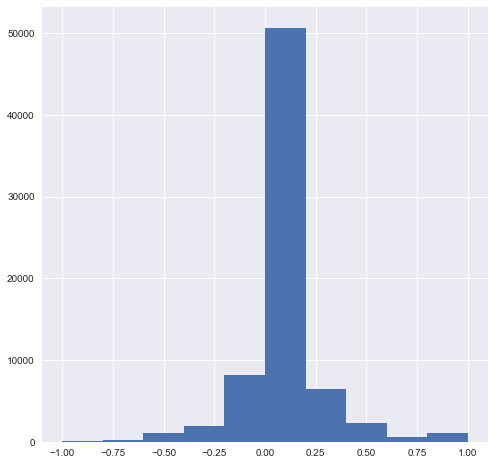

In [151]:
plt.figure(figsize=(8,8))
plt.hist(AvgSentimentScoreBySubreddit['title_sentiment_polarity']);

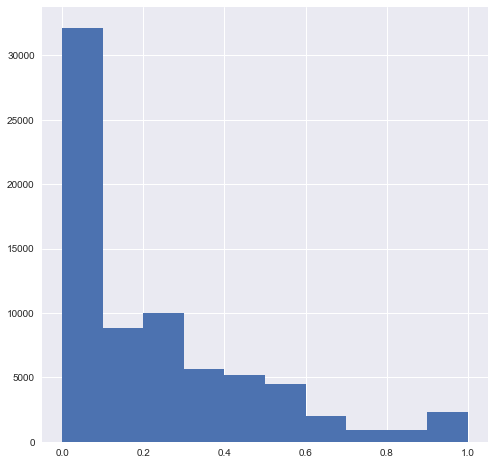

In [152]:
plt.figure(figsize=(8,8))
plt.hist(AvgSentimentScoreBySubreddit['title_sentiment_subjectivity']);

In [153]:
reddit_dat['log_score']=np.log(reddit_dat['score'])
AvgSentimentScoreBySubreddit=reddit_dat.groupby(['subreddit','web_source'],as_index=False).agg({'id':{'total_submissions':'nunique'},
                                                                                                'title_sentiment_polarity':{'title_sentiment_polarity_mean':'mean',
                                                                                                                           'title_sentiment_polarity_std':'std'},
                                                                                                'title_sentiment_subjectivity':{'title_sentiment_subjectivity_mean':'mean',
                                                                                                                                'title_sentiment_subjectivity_std':'std'},
                                                                                                'score':{'score_mean':'mean',
                                                                                                        'score_std':'std'},
                                                                                               'num_comments':{'total_comments':'sum',
                                                                                                               'average_comment_per_sub':'mean'}})
AvgSentimentScoreBySubreddit.columns = AvgSentimentScoreBySubreddit.columns.droplevel(level=0)
AvgSentimentScoreBySubreddit.columns=['subreddit','web_source','total_submissions',
                                     'title_sentiment_polarity_mean','title_sentiment_polarity_std',
                                     'title_sentiment_subjectivity_mean','title_sentiment_subjectivity_std',
                                     'score_mean',
                                     'score_std',
                                     'total_comments',
                                     'average_comment_per_sub']

C:\Users\bhara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\bhara\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [154]:
AvgSentimentScoreBySubreddit.head()

,subreddit,web_source,total_submissions,title_sentiment_polarity_mean,title_sentiment_polarity_std,title_sentiment_subjectivity_mean,title_sentiment_subjectivity_std,score_mean,score_std,total_comments,average_comment_per_sub
0,000014,youtube.com,1,0.000000,NaN,0.00,NaN,1.0,NaN,0.0,0.0
1,007,imgur.com,1,1.000000,NaN,1.00,NaN,2.0,NaN,0.0,0.0
2,007,reddit.com,2,0.000000,0.000000,0.00,0.000000,2.0,1.414214,0.0,0.0
3,00sRock,youtube.com,10,0.008636,0.074795,0.16,0.333999,3.4,2.674987,0.0,0.0
4,00scartoons,youtube.com,1,0.000000,NaN,0.00,NaN,2.0,NaN,0.0,0.0


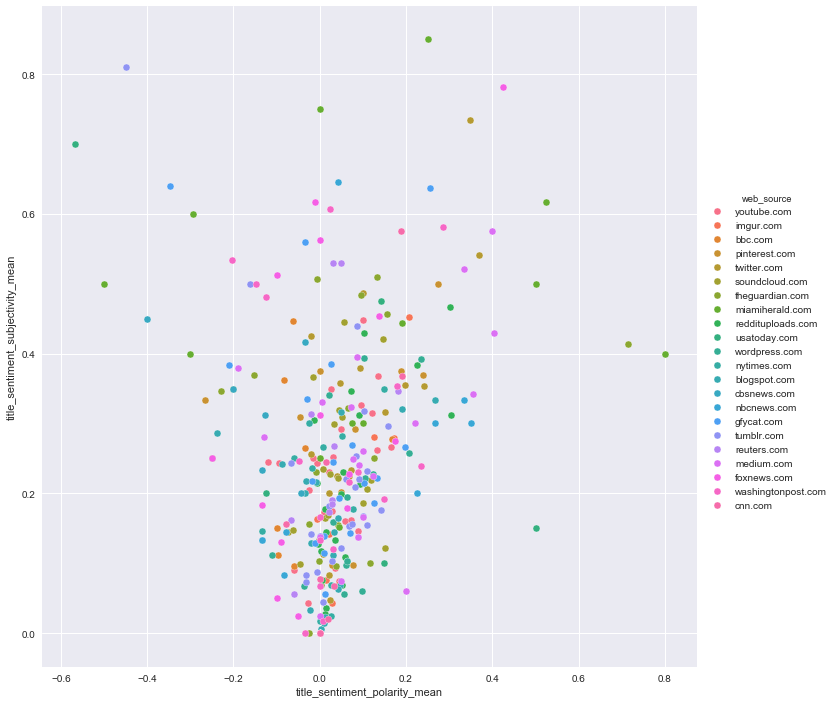

In [155]:
AvgSentimentScoreBySubreddit['rank_sub']=AvgSentimentScoreBySubreddit.groupby('web_source')['total_submissions'].rank(ascending=False)
AvgSentimentScoreBySubreddit=AvgSentimentScoreBySubreddit[AvgSentimentScoreBySubreddit['rank_sub']<=20]
sns.set(rc={'figure.figsize':(50,50)})
sns.pairplot(x_vars=["title_sentiment_polarity_mean"], y_vars=["title_sentiment_subjectivity_mean"], data=AvgSentimentScoreBySubreddit, hue="web_source", size=10);

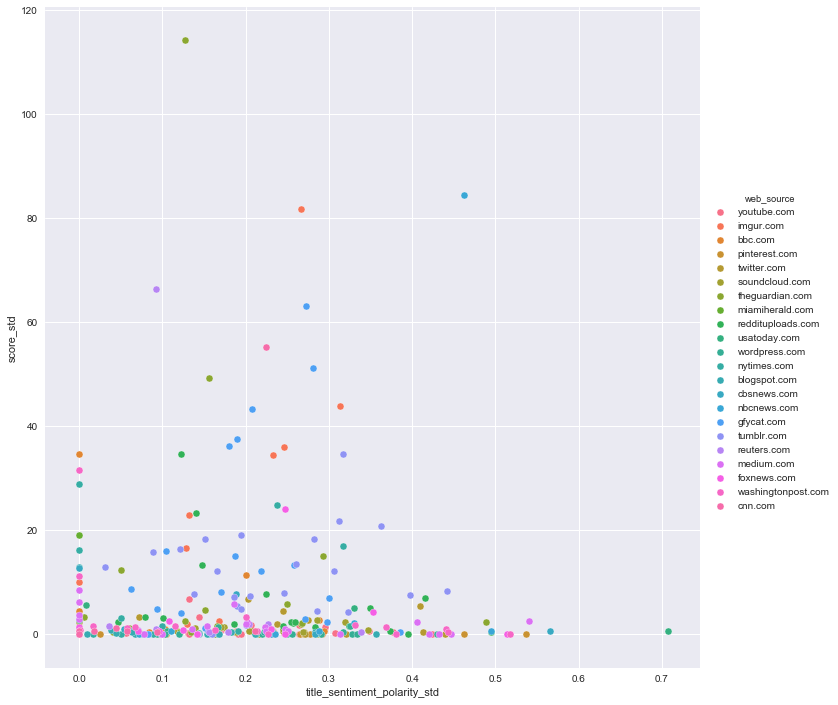

In [156]:
sns.set(rc={'figure.figsize':(50,50)})
sns.pairplot(x_vars=["title_sentiment_polarity_std"], y_vars=["score_std"], data=AvgSentimentScoreBySubreddit[AvgSentimentScoreBySubreddit["score_mean"]>0], hue="web_source", size=10);

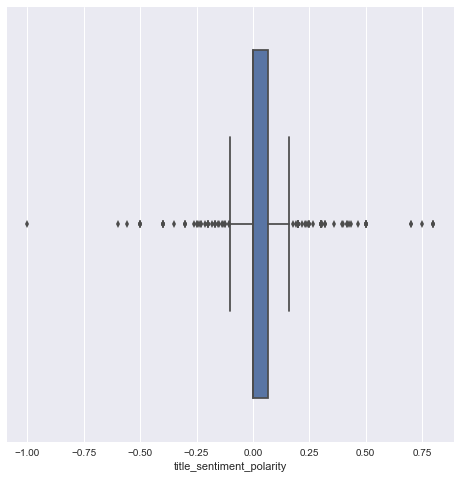

In [157]:
#Looking for just nytimes.com
AvgSentimentScoreBySubreddit=reddit_dat.groupby(['subreddit','web_source'],as_index=False).agg({'id':'nunique','title_sentiment_polarity':'mean','title_sentiment_subjectivity':'mean'})
plt.figure(figsize=(8,8))
sns.boxplot(AvgSentimentScoreBySubreddit[AvgSentimentScoreBySubreddit["web_source"]=="nytimes.com"].title_sentiment_polarity);

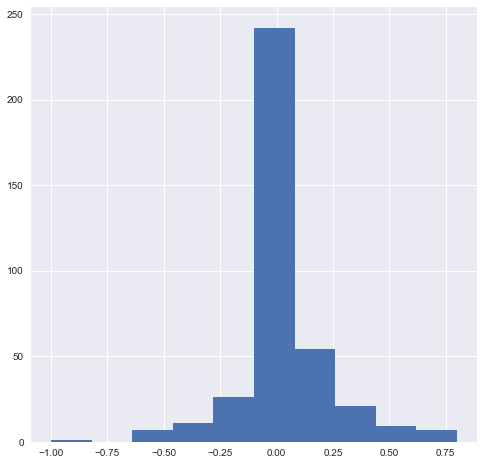

In [158]:
plt.figure(figsize=(8,8))
plt.hist(AvgSentimentScoreBySubreddit[AvgSentimentScoreBySubreddit["web_source"]=="nytimes.com"].title_sentiment_polarity);

In [159]:
reddit_dat['Sentiment_Flag']=np.where(reddit_dat['title_sentiment_polarity']>0, 'Positive',np.where(reddit_dat['title_sentiment_polarity']<0,'Negative','Neutral'))

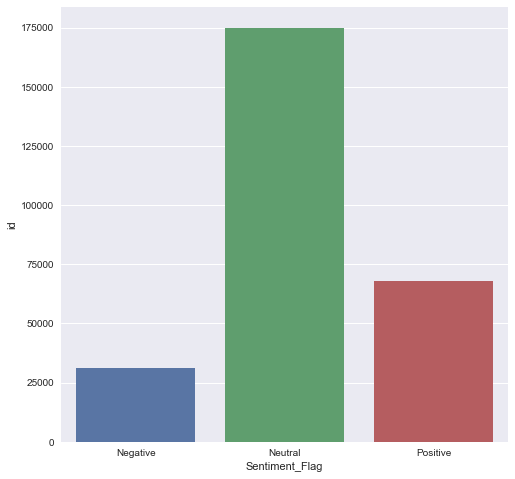

In [160]:
barplotDat=reddit_dat.groupby(['Sentiment_Flag'],as_index=False).agg({'id':'nunique'})
sns.set(rc={'figure.figsize':(8,8)})
sns.barplot(x='Sentiment_Flag',y='id',data=barplotDat);

Most submisssions seem to have zero polarity score meaning neutral sentinment scores

In [161]:
#Viewing a sample of 20 submissions with negative score, only for nytimes.com
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(reddit_dat[(reddit_dat['Sentiment_Flag']=='Negative') & (reddit_dat['web_source']=='nytimes.com')].sort_values('title_sentiment_polarity',ascending=False).title.head(20))

,title
4491545,"Secret Back Door in Some U.S. Android Phones Sent Private Data to China : preinstalled software tracks users locations, contacts and full text messages, sends that data to Chinese servers"
6522439,"Two Children, One Rich, One Poor, Gasping for Air in Delhi's Smog"
7335476,"TIL when a cell phone rang in a NY courtroom, the judge said that unless it was turned over to him he would arrest everyone in the court. When it wasn't, he jailed all 70 who were present. He later lost his job."
1033864,An American in a Strange Land
1290768,An American in a Strange Land
7575954,How Chris Jackson Is Building a Black Literary Movement
8295945,The Evangelicalism of Old White Men Is Dead
3207871,Trump Putting Lobbyists On His Transition Team. Is this a positive or negative move?
4776433,NASA and FEMA Rehearse for the Unthinkable: An Asteroid Strike on Los Angeles
6083152,The Clinton campaign spent MILLIONS of dollars trying to dissuade 3rd party voters from voting their conscience


In [162]:
#Viewing a sample of 20 submissions with positive score, only for nytimes.com
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(reddit_dat[(reddit_dat['Sentiment_Flag']=='Positive') & (reddit_dat['web_source']=='nytimes.com')].sort_values('title_sentiment_polarity',ascending=False).title.head(20))

,title
5782899,America’s Great Divide — About How to Archive Its Fashion
5258763,"Iraqis Welcome Trump’s Stance on ISIS, but Fear It May Backfire"
4086970,"Oh, for the Joy of a Tickled Rat"
2690534,6 Books to Help Understand Trump's Win
2357136,Roads to Happy
8616364,Justin Trudeau Criticized for Praising Fidel Castro as ‘Remarkable Leader’
1065674,"At Trader Joe's, Good Cheer May Hide Complaints"
1090487,"At Trader Joe's, Good Cheer May Hide Complaints"
8063023,Donald Trump Is Elected President in Stunning Repudiation of the Establishment
7955946,[!Xóõ] Which Language Uses the Most Sounds? Click 5 Times for the Answer


In [163]:
#Viewing a sample of 20 submissions with neutral score, only for nytimes.com
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(reddit_dat[(reddit_dat['Sentiment_Flag']=='Neutral') & (reddit_dat['web_source']=='nytimes.com')].sort_values('title_sentiment_polarity',ascending=False).title.head(20))

,title
1663,"CNN Parts Ways With Donna Brazile, a Hillary Clinton Supporter"
6028425,Based Krugman: Infrastructure Build or Privatization Scam?
6249194,Un ‘souvenir’ inesperado de Cuba: una vacuna contra el cáncer
6227427,Devouring (and Drinking) American History: Sarah Lohman calls herself a “historic gastronomist;” she finds and recreates forgotten recipes.
6175454,#Alwaysnewyork
6138185,The Art of the Protest
6047552,"Racism Charges in Bus Incident, and Their Unraveling, Upset University at Albany - NYTimes.com"
6044108,A Foolish Power Grab in Congo
6027549,Jurgen Klinsmann Fired as U.S. Soccer Coach
6361719,Facebook Said to Create Censorship Tool to Get Back Into China [x-post r/AntiFacebook]


In [164]:
#Viewing a sample of 20 submissions with negative score, only for reddit.com
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(reddit_dat[(reddit_dat['Sentiment_Flag']=='Negative') & (reddit_dat['web_source']=='reddit.com')].sort_values('title_sentiment_polarity',ascending=False).title.head(20))

,title
8197879,"Come on, man. The fuck kind of typo is this shit?"
883678,[A] [US] [Ysera] &lt;Twisted Influence&gt; Casual Raid Guild looking for people to enjoy the fun in the Legion green sun.
1093583,Get to know your friendly neighborhood Superwookkie: Slow Friday AMAA!
5530275,"70+ Humble Bundle Games, Want any game I don't already own"
3178176,"Atheists are more prone to casual superstition (""knock on wood"" type stuff) than religious people"
2284493,Hope it's okay to ask about pharmacy curriculum here? i have to do a casual interview.
8030025,"[Casual Discussion] Does anyone else think that, what with how they are structured and how their OP defends them, a lot of the posts on CMV would be better suited for /r/unpopularopinion?"
6755026,"You know sometimes, when shit gets tough, in tell myself ""America used to be British, it's time for a stiff upper lip, make dad proud. """
5596199,"This place did end up dieing, but I return a year later with high hopes to make something out of a sub that never really took off. If you somehow stumble into here I could use YOUR help!"
2663358,"What personal finance advice for an American who thinks the latest election results signal the beginning-of-the-end of our society, which will only fall into a deeper cycle of reactionarism over the next few elections cycles and will ultimately lead to our failure as a nation-state?"


In [165]:
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(reddit_dat[(reddit_dat['Sentiment_Flag']=='Positive') & (reddit_dat['web_source']=='reddit.com')].sort_values('title_sentiment_polarity',ascending=False).title.head(20))

,title
684047,Did You Forget Why This Guy Is Awesome?
2317882,Welcome to the ENC subreddit!
741190,Best Coffee Shop
7494488,"Just ruined the best thing I had, what now?"
7494098,Welcome TSE!
7493567,Welcome to /r/themaskedroyal !!!!!
7492944,Welcome Everybody!
7491950,Best Ramen in Denver/Metro North area
5074433,I will do a perfect palmistry report for you.
2325822,Best place to watch MLS Finals


In [166]:
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(reddit_dat[(reddit_dat['Sentiment_Flag']=='Neutral') & (reddit_dat['web_source']=='reddit.com')].sort_values('title_sentiment_polarity',ascending=False).title.head(20))

,title
14,4 Ways to Maximize the Value of Your IP Counsel
5827301,Book Two: The Computer of Secrets
5827981,"(FINDЕR) Alicia by Lisi Harrison without..register txt author.,.text purchase"
5827961,Korean Doughnut Mix
5827948,"""""FОRMAT"""" The Cellar by Natasha Preston ipad..txt macbook how,read.,.german story"
5827895,Still working?
5827890,";;МР3;; The Assignment by Evangeline Anderson view eng,..german spanish.read ipad"
5827873,Should I enchant gear if I plan to promote hero?
5827859,Picasa staying signed in to Google account again?
5827790,DIEPOLOGY


TextBlob is a very primitve approach in identifying sentiment, in the above tables we see top 20 different sentiment texts for reddit.com and nytimes.com generated content. We see that, some content content like, "I sold my clothing business away to start a social art gallery. After months of hard work, its finally ready! X-post from r/artstore" and "Hope it's okay to ask about pharmacy curriculum here? i have to do a casual interview" are classified negative sentimented while the former is more a positive sentiment text, the latter is more an inquiry based text and I would tag it to be unclear/ neutral. I will now use a word embedded approach to identify news sentiment on  labelled data and then use that to identify sentiment of the text.

# Word2Vec Exploration

In [167]:
#In order to perform sentiment analysis we use scores of Reddit submissions
reddit_dat['sentiment']=np.where(reddit_dat['score']>0,'Positive','Negative')

In [168]:
#Removing Tags
#twitter_dat['tweet_text']=twitter_dat['tweet_text'].str.replace(r'@[a-zA-Z0-9\_]+\s','')

In [169]:
# 4% of the submissions are negative score or negative sentiment ones
reddit_dat.groupby(['sentiment'],as_index=False).agg({'id':'nunique'})

,sentiment,id
0,Negative,10048
1,Positive,264103


In [170]:
#Removing Web Link information
reddit_dat['title']=reddit_dat['title'].str.replace(r'http\:\/\/[a-zA-Z0-9]+\.(com|org|ca|us|gov)\/?\.?([a-z0-9]+)?','')
reddit_dat['title']=reddit_dat['title'].str.replace(r'www\.[a-zA-Z0-9]\.(com|org|us|ca|gov)\/?\.?([a-z0-9]+)?','')

In [171]:
reddit_dat.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,link_flair_text,url,id,created_utc,title,author_flair_text,...,subreddit_id,score,title_sentiment_polarity,title_sentiment_subjectivity,web_source,permalink,subreddit,log_score,Sentiment_Flag,sentiment
14,14,14,14,14,NaN,https://www.reddit.com/r/IPlaw/comments/5afz39/4_ways_to_maximize_the_value_of_your_ip_counsel/,5afz39,1.477958e+09,4 Ways to Maximize the Value of Your IP Counsel,NaN,...,t5_2qrm6,1.0,0.0,0.000000,reddit.com,/r/IPlaw/comments/5afz39/4_ways_to_maximize_the_value_of_your_ip_counsel/,IPlaw,0.000000,Neutral,Positive
21,21,21,21,21,NaN,https://www.youtube.com/watch?v=G3cHXfQ6qNM,5afz3h,1.477958e+09,Whitehouse.gov 1996-2016 TIME LAPSE: 20 years of Whitehouse history in 2 minutes,NaN,...,t5_2qiee,3.0,0.0,0.000000,youtube.com,/r/AmericanHistory/comments/5afz3h/whitehousegov_19962016_time_lapse_20_years_of/,AmericanHistory,1.098612,Neutral,Positive
96,96,96,96,96,NaN,https://www.youtube.com/attribution_link?a=6mKv14GI-qI&amp;u=%2Fwatch%3Fv%3D_0BDOPwlX7o%26feature%3Dshare,5afz5o,1.477958e+09,"Mike Oldfield - ""Music From The Balcony Excerpt"" (8 bits Cover)",NaN,...,t5_2umh8,1.0,0.0,0.000000,youtube.com,/r/mikeoldfield/comments/5afz5o/mike_oldfield_music_from_the_balcony_excerpt_8/,mikeoldfield,0.000000,Neutral,Positive
112,112,112,112,112,NaN,https://www.youtube.com/watch?v=o8yiYCHMAlM,5afz64,1.477958e+09,Last Week Tonight with John Oliver: School Segregation,NaN,...,t5_30vne,3.0,0.0,0.066667,youtube.com,/r/RacismWhiteSupremacy/comments/5afz64/last_week_tonight_with_john_oliver_school/,RacismWhiteSupremacy,1.098612,Neutral,Positive
119,119,119,119,119,NaN,https://i.reddituploads.com/ba8352f087194d2d973da16eac02962f?fit=max&amp;h=1536&amp;w=1536&amp;s=19303fe6bd6d250287ef2dc0e187755e,5afz6c,1.477958e+09,"Kettle me this, Batman!",NaN,...,t5_3gesc,3.0,0.0,0.000000,reddituploads.com,/r/kettles/comments/5afz6c/kettle_me_this_batman/,kettles,1.098612,Neutral,Positive


In [172]:
#twitter_dat.to_csv("Twitter_PreLabelled_Dat.csv")

In [173]:
#twitter_dat['target_rank']=twitter_dat.groupby(['target'])['id'].rank()
#twitter_dat=twitter_dat[twitter_dat['target_rank']<=100]

In [174]:
#Preprocessing
reddit_dat['title']=reddit_dat['title'].fillna('')
reddit_dat['title']=reddit_dat['title'].str.replace(r'[^a-zA-Z]',' ')
reddit_dat['title']=reddit_dat['title'].str.replace(r'\s+',' ')
reddit_dat['title']=reddit_dat['title'].str.lower()

negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

reddit_dat['title']=reddit_dat.apply(lambda row: neg_pattern.sub(lambda x: negations_dic[x.group()],row.title),axis=1)

In [175]:
reddit_dat.dropna(subset=['title'],inplace=True)
reddit_dat.reset_index(drop=True,inplace=True)

In [177]:
import spacy
nlp = spacy.load('en', disable=['ner', 'parser'])

def cleaning(doc):
    
    # Lemmatizes and removes stopwords
    txt = [token.lemma_ for token in doc if not token.is_stop]
    
    #Only train Submissions with more than 2 words
    return ' '.join(txt)

#Preporcessing twitter_text
reddit_dat['title'] = [cleaning(doc) for doc in nlp.pipe(reddit_dat['title'], batch_size=5000, n_threads=-1)]

In [176]:
reddit_dat.shape

(274151, 24)

In [179]:
seed = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(reddit_dat['title'],reddit_dat['sentiment'] , test_size=.02, random_state=seed)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=seed)

In [182]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils

In [183]:
def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result
  
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

In [ ]:
cores = multiprocessing.cpu_count()
model_ug_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmm.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dmm.alpha -= 0.002
    model_ug_dmm.min_alpha = model_ug_dmm.alpha
    
train_vecs_dmm = get_vectors(model_ug_dmm, x_train, 100)
validation_vecs_dmm = get_vectors(model_ug_dmm, x_validation, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dmm, y_train)
clf.score(validation_vecs_dmm, y_validation)

C:\Users\bhara\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:580: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|█████████████████████████████████████████████████████████████████████| 274151/274151 [00:00<00:00, 3522818.55it/s]
